# Data Science workshop 10: Advanced regression (Solutions)

Feel free to go through to refer back to the workshop content when solving these problem!

## Debugging problems

The following problems will have written code that is incorrect or missing in some way. Your job will be to debug it and fix it so that it works as intended. When debugging code, the error messages can foten tell you where a problem may lie. Here the comments indicate what the code is intended to do.

For these you will be working with the same dataset as in the [workshop](workshop.ipynb) but now you will be working with Y2 as a target.

## 1) Examine the new target variable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("data/ENB2012_data.csv")
#remove any data that doesn't have any information attached
data.dropna(thresh = 3, inplace = True)
data.dropna(axis = 1, inplace = True)
#rpint out the data
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5.0,0.4,5.0,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2.0,0.4,5.0,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3.0,0.4,5.0,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4.0,0.4,5.0,16.48,16.61


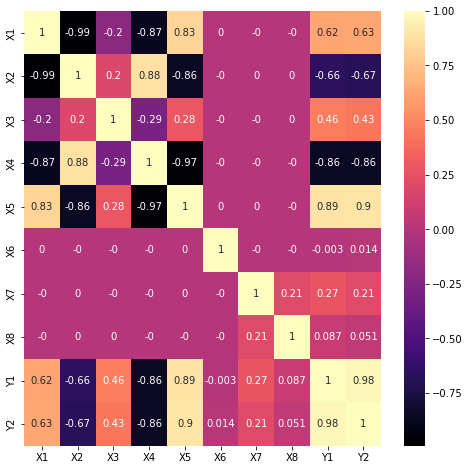

In [2]:
#create a correlation matrix
corrMatrix = data.corr()

#create the base axis for the plot
fig, ax = plt.subplots(1,1, figsize = (8,8))

#create a sns heatmap
sns.heatmap(corrMatrix.round(3), annot = True,
           ax = ax, cmap = "magma")

#show the plot
plt.show()

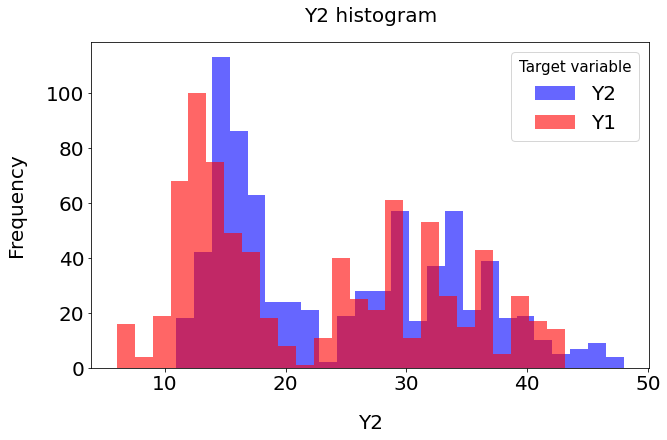

In [3]:
#create the base axis
fig, ax = plt.subplots(1,1, figsize = (10,6))

#plot a histogram of Y2
data["Y2"].plot.hist(ax = ax, bins = 25,
                    color = "blue",
                    label = "Y2",
                    alpha = 0.6)
#plot a histogram of Y1
data["Y1"].plot.hist(ax = ax, bins = 25,
                    color = "red",
                    label = "Y1",
                    alpha = 0.6)

#add a legend
ax.legend(fontsize = 20,
         title = "Target variable",
         title_fontsize = 15)

#add titles
ax.set_title("Y2 histogram",
            fontsize = 20,
            pad = 20)
ax.set_ylabel("Frequency", 
             fontsize = 20,
             labelpad = 20)
ax.set_xlabel("Y2",
             fontsize = 20,
             labelpad = 20)
ax.tick_params(axis = "both",
              which = "both",
              labelsize = 20)

#show the result
plt.show()

How does that compare to the distribution of Y1 and how are they related?

## 2) Implement the three linear regression

Implement the three linear regression. How do the results compare to thos using the Y1 target variable?

In [4]:
#import the splitting function from sklearn
from sklearn.model_selection import train_test_split

#remove the necessary target columns
X = data.drop(columns = ["Y1", "Y2"])
#set Y2 as our target
y = data[["Y2"]]

#create the training and test data
X_train, X_test, y_train, y_test = (
    train_test_split(X, y, test_size = 0.3,
                    random_state = 42)
)

In [5]:
#import the linear regression model
from sklearn.linear_model import LinearRegression

#create the linear regression
reg = LinearRegression().fit(X_train, y_train)

#print the result on the test data
print(reg.score(X_test, y_test))

0.8866077367589531


In [6]:
#import the Lasso regression model
from sklearn.linear_model import Lasso

#iniate the model with an alpha = 0.1
lasso_model = Lasso(alpha = 0.1)

#fit the model to the data
lasso_model.fit(X_train, y_train)

#print the results on the test data
print(lasso_model.score(X_test, y_test))

0.8731534144958804


In [7]:
#import the ridge regression
from sklearn.linear_model import Ridge

#initiate the ridge model with an alpha = 0.1
ridge_model = Ridge(alpha = 0.1)

#fit the model to the data
ridge_model.fit(X_train, y_train)

#print the results on the test data
print(ridge_model.score(X_test, y_test))

0.8841572243146434


What could you do to improve these results?

- Think about adjusting the alpha values as we did in the workshop
- Think about whether Elastic Net Regression would be useful in this situation
- What could you do to better understand the effects of alpha?

## 3) Implement the two non-linear regression

Implement the two non-linear regressions. How do the results compare to those using the Y1 target variable?

In [8]:
#import the decision tree regression module
from sklearn.tree import DecisionTreeRegressor

#create the regression tree with a max depth of 5
reg_tree = DecisionTreeRegressor(random_state = 42,
                                max_depth = 5)

#fit the regression tree
reg_tree.fit(X_train, y_train)

#check the score on the test set
reg_tree.score(X_test, y_test)

0.9571803117062638

In [9]:
#import the random forest library
from sklearn.ensemble import RandomForestRegressor

#create the random forest with 10 estimators
reg_random_forest = RandomForestRegressor(n_estimators = 10,
                                         random_state = 42)

#fit the regression to the data
reg_random_forest.fit(X_train, y_train.values.reshape(-1))

#check the score on the test data
print(reg_random_forest.score(X_test, y_test))

0.9654068343088746


What could you do to improve the results?

- Think about what paramaters could you adjust in the model
- Is there anyway you could visualise the results
- Can you visualise the trade off between bias and variance in the models

# Coding from scratch 

This section will include problems where no code is given

## 1) Find a dataset that you can perform these models on to test your knowledge

Sources include:

- [UCI machine learning repository](https://archive.ics.uci.edu/ml/index.php)
- [Kaggle](https://www.kaggle.com/)
- [Google datasets](https://datasetsearch.research.google.com/)